<a href="https://colab.research.google.com/github/Arunav07/CRISTL-Project-1/blob/Anuja's-branch/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import natsort
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import tensorflow.keras.utils.to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
Labels_Data = pd.read_csv("/content/gdrive/MyDrive/IDD_Detection/AutomatedLabelFile.csv")
Labels_Data.shape

(663, 11)

In [13]:
Images = glob.glob("/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/*.jpg")

In [14]:
len(Images)

663

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

'''img = mpimg.imread('image.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()'''

"img = mpimg.imread('image.png')     \ngray = rgb2gray(img)    \nplt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)\nplt.show()"

In [16]:
Image_array=[]
for i in Images:
  img = image.load_img(i,target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255
  img = rgb2gray(img)
  Image_array.append(img)
Image_Data = np.array(Image_array)

In [17]:
Image_Data.shape

(663, 256, 256)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Image_Data, Labels_Data, random_state=42, test_size=0.2)

In [19]:
X_train.shape

(530, 256, 256)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import UnidentifiedImageError
import skimage.io
import skimage.color
import skimage.filters
import io
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu
from tensorflow.keras.layers import LSTM,BatchNormalization
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool3D
# from tensorflow.python.keras.preprocessing.image import img_to_array

in_shape=(225,256,256,3)

model = Sequential()
model.add(ConvLSTM2D(16, kernel_size=(3,3), activation='relu',return_sequences=True, padding='valid', input_shape=in_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(ConvLSTM2D(32, (3,3), activation='relu', return_sequences=True, padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool3D(pool_size=(1, 2, 2)))
model.add(Dropout(0.3))

model.add(ConvLSTM2D(64, (3,3), activation='relu', return_sequences=True, padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool3D(pool_size=(1, 2, 2)))
model.add(Dropout(0.4))

model.add(ConvLSTM2D(128, (3,3), activation='relu', return_sequences=False, padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool3D(pool_size=(1, 2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(11, activation='sigmoid'))

In [ ]:
'''in_shape=(None,256,256,3)
model = Sequential()
model.add(ConvLSTM2D(64, kernel_size=(3,3), return_sequences=True, activation='relu', input_shape= in_shape))
model.add(ConvLSTM2D(128, kernel_size=(3,3), return_sequences=True, activation='relu'))
model.add(ConvLSTM2D(64, kernel_size=(3,3), return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))
# model.add(Dense(11, activation='sigmoid'))'''

In [ ]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(256, 256)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences=False, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(11, activation='softmax'))
# model.add(Dense(11, activation='sigmoid'))

In [33]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
opt_adam = tf.keras.optimizers.Adam(clipnorm=1.)
model.compile(optimizer=opt_adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#X_train = X_train.reshape((X_train.shape[0], 256, 256, 1))
#X_test = X_test.reshape((X_test.shape[0], 256, 256, 1))

In [ ]:
#X_train[0]

In [36]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
17/17 [==============================] - 27s 2s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 2/50
17/17 [==============================] - 23s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 3/50
17/17 [==============================] - 23s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 4/50
17/17 [==============================] - 24s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 5/50
17/17 [==============================] - 23s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 6/50
17/17 [==============================] - 23s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 7/50
17/17 [==============================] - 23s 1s/step - loss: nan - accuracy: 0.6226 - val_loss: nan - val_accuracy: 0.5639
Epoch 8/50
17/17 [==============================] - 23s 1s/ste

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 256, 64)           82176     
                                                                 
 dropout_6 (Dropout)         (None, 256, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 256, 128)          98816     
                                                                 
 dropout_7 (Dropout)         (None, 256, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [37]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

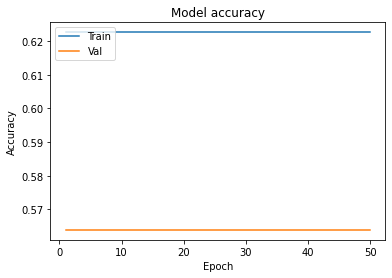

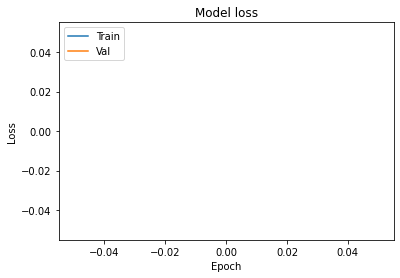

In [38]:
plot_learningCurve(history, 50)

In [ ]:
classes = ['truck',	'person',	'autorickshaw',	'car'	,'motorcycle',	'rider',	'bus'	,'bicycle',	'vehicle_fallback'	,'traffic_sign',	'animal'] 

In [ ]:
'''
classes = np.array(Labels_Data.columns[:])
proba = model.predict(img)
top_11 = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top_11[i]])+" ({:.5})".format(proba[0][top_11[i]]))
#plt.imshow(img)
'''

In [ ]:
def get_laebls(y):
  li = len(np.where(y > 0.75)[1])
  pred = np.argsort(y)[0][:-li:-1]
  labels = []
  for i in pred:
    labels.append(classes[i])

  ## if labels more than 4
  ## drop last
  if len(labels) > 5:
    return labels[:5]
  else:  
    return labels

animal, traffic_sign, vehicle_fallback, bicycle, bus


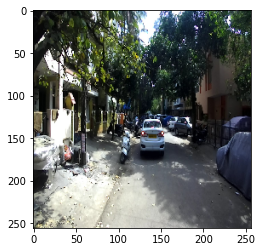

In [ ]:
img_width = 256
img_height = 256

img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0004627.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
img = rgb2gray(img)

#classes = data.columns[3:]
y_prob = model.predict(img)
out = get_laebls(y_prob)
print(*out, sep=', ')

animal, traffic_sign, vehicle_fallback, bicycle, bus


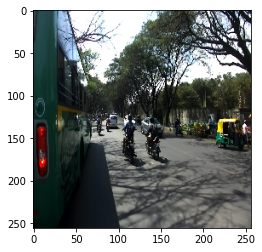

In [ ]:
#predicts the same objects coz probability for each prediction is NaN
img_width = 256
img_height = 256

img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0008811.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
img = rgb2gray(img)

#classes = data.columns[3:]
y_prob = model.predict(img)
out = get_laebls(y_prob)
print(*out, sep=', ')